# Visualizing Beyond 1D
In this section we will explore how to visualize data in higher dimensions beyond 1D. We will use Python libraries such as Matplotlib, Seaborn and Altair to create 2D and 3D visualizations. Also scatterplot matrices and parallel coordinates plots will be discussed for higher dimensional data.

In [1]:
# For Jupyter notebooks, use 'widget' backend for interactivity
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
# make text editable in Illustrator
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# import altair
import altair as alt
alt.data_transformers.disable_max_rows()


DataTransformerRegistry.enable('default')

Let's start with the Iris dataset, which is widely used in machine learning and statistics.
This dataset contains measurements of different Iris flower species, including:

 - Sepal Length and Width
 - Petal Length and Width

Let's load the dataset:

In [2]:
df_iris = pd.read_csv('../../Datasets/iris.csv') # remember to change the path if needed
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa



Let's first pick up two variables and see how they are related. For this example, we will use the Sepal Length and Sepal Width from the Iris dataset.

In [3]:

# Let's first pick up two variables and see how they are related. For this example, we will use the Sepal Length and Sepal Width from the Iris dataset.
# We will use Altair to create a scatter plot of Sepal Length vs Sepal Width.
# Create a scatter plot using Altair
scatter_plot = alt.Chart(df_iris).mark_circle(size=60).encode(
    x=alt.X('SepalLengthCm', scale=alt.Scale(zero=False)), # This ensures that the x-axis does not start from zero
    y=alt.Y('SepalWidthCm', scale=alt.Scale(zero=False)),
    color='Species',  # Color by species
    tooltip=['SepalLengthCm', 'SepalWidthCm', 'Species']  # Add tooltips
).properties(
    title='Scatter Plot of Sepal Length vs Sepal Width'
)
scatter_plot

alt.Chart(...)

Now let's pick 3 variables from the Iris dataset and visualize them in a 3D scatter plot using Matplotlib. If you enabled interactive mode, you can rotate the plot to see how the data is distributed in 3D.

You can comment the lines that draw the vertical lines in case the plot is too crowded. 


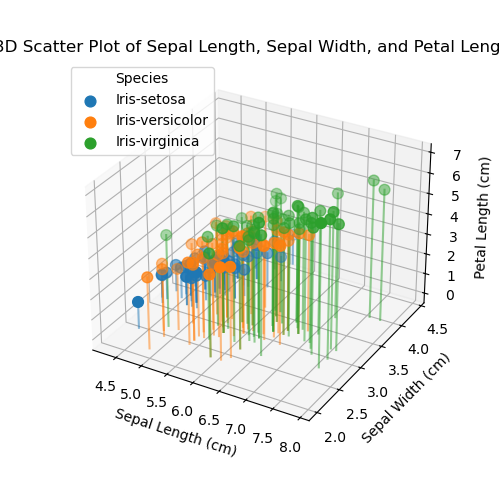

In [4]:
# Let's now do a 3D scatter plot using Matplotlib to visualize the relationship between Sepal Length, Sepal Width, and Petal Length.
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
# Extract the data for plotting
colorsFunction = plt.get_cmap('tab10') # get a colormap for coloring the points
for group_index,(group, group_data) in enumerate(df_iris.groupby('Species')):
        x = group_data['SepalLengthCm']
        y = group_data['SepalWidthCm']
        z = group_data['PetalLengthCm']
        # Plot each group with a different color
        color = colorsFunction(group_index)
        ax.scatter(x, y, z, label=group, s=60, color=color) # s is the size of the markers
        # You can try to add vertical lines from the points to the z-axis to show the height of each point
        # add vertical lines to show the height of each point
        # It can be very confusing with many points, so use it carefully
        for i in range(len(x)):
            ax.plot([x.iloc[i], x.iloc[i]], [y.iloc[i], y.iloc[i]], [0, z.iloc[i]], color=color, alpha=0.5)
# Set legend
ax.legend(title='Species', loc='upper left')
# Set labels
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal Length (cm)')
# Set title
ax.set_title('3D Scatter Plot of Sepal Length, Sepal Width, and Petal Length')
plt.show()

What do you think? Maybe not super clear, and we still need one more dimension we never observed. Instead, let's see a heatmap of the Pearson correlation matrix of the Iris dataset. Let's plot that using Seaborn.

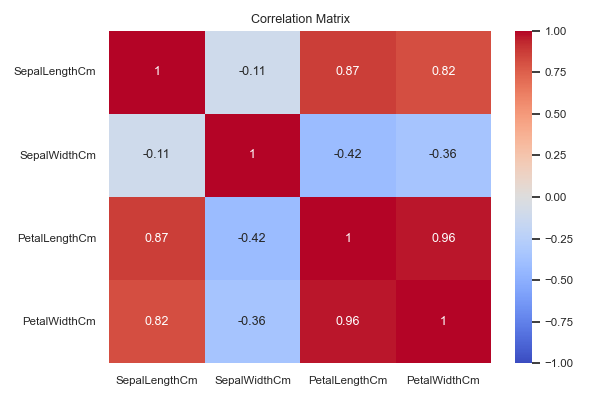

In [12]:
numeric_variables = df_iris.select_dtypes(include=np.number)
# let's remove the 'Id' column if it exists, as it is not a part of the original iris dataset
if 'Id' in numeric_variables.columns:
    numeric_variables = numeric_variables.drop(columns=['Id'])
correlation_table = numeric_variables.corr()
correlation_table


# Create heatmap of the correlation matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_table, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# when plotting a correlation matrix, it is always a good idea to set the color
# limits (vmin and vmax) to -1 and 1 to ensure the color scale is consistent across
# the plot. Also use a diverging colormap like 'coolwarm' to show positive and
# negative correlations clearly.
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

We can also take a look at the Spearman correlation matrix, which is a non-parametric measure of correlation. This can be useful when the data does not follow a normal distribution.


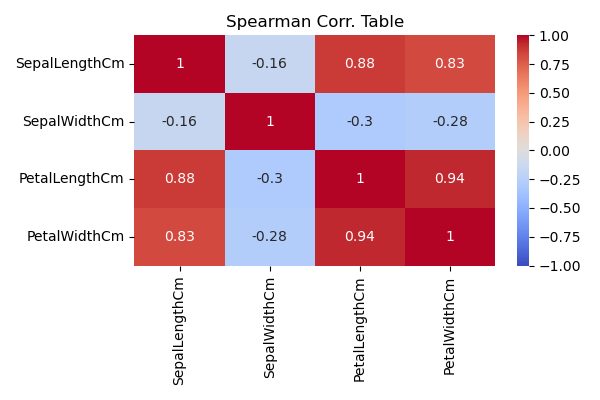

In [6]:
# same but for Spearman
correlation_table = numeric_variables.corr(method='spearman')

# Create heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_table, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Spearman Corr. Table')
plt.tight_layout()
plt.show()

Ok super cool. So now let's try a scatterplot matrix (also known as a pair plot) to visualize the relationships between all pairs of features in the Iris dataset. This will give us a good overview of how each feature relates to the others.

A scatterplot matrix is a grid of scatterplots that allows us to visualize the pairwise relationships between multiple variables in a dataset. It is a powerful tool for identifying correlations, trends, and potential outliers across different dimensions of the data.

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. Seaborn works well with pandas data structures and integrates closely with matplotlib. With seaborn it is easy to create scatterplot matrices.

For more examples check out the seaborn documentation: https://seaborn.pydata.org/examples/scatterplot_matrix.html

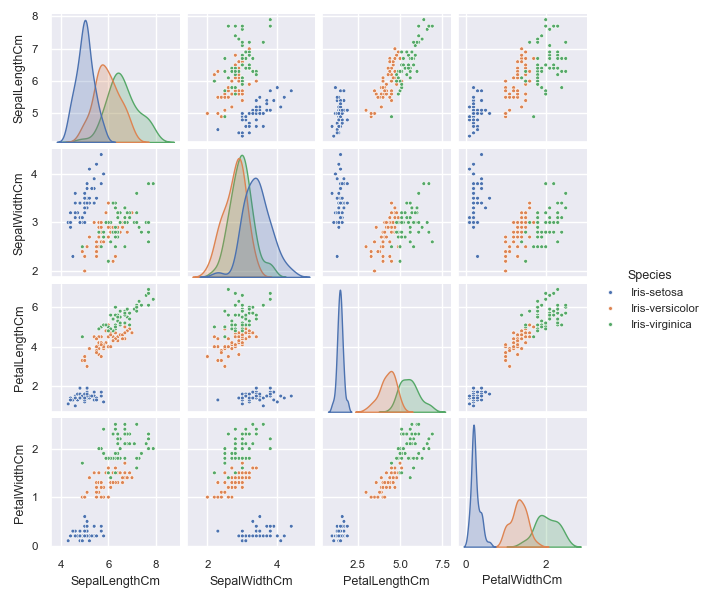

In [7]:
# for the iris dataset
df_iris_without_id = df_iris.copy()
df_iris_without_id = df_iris_without_id.drop(columns=['Id']) # remove 'Id' if it exists

sns.set_theme(font_scale=0.75)  # Set the font scale to reduce the font size
sns.pairplot(df_iris_without_id, hue='Species', height=1.5, markers='.', plot_kws={'s': 30}) 
plt.show()

Nice! So now let's try something new, let's visualize a parallel plot using Altair. Parallel coordinates plots are a common way to visualize high-dimensional data. Each feature is represented by a vertical line, and each observation is represented by a polyline that connects the values of each feature.


Creating a parallel plot is not straightforward because each feature needs to be reescaled to fit within the same range.



In [ ]:
from altair import datum
# datumm is used to refer to the current datum in Altair's transform_calculate
# it refers to the current row of data being processed in the Altair chart pipeline.

chart = alt.Chart(df_iris).transform_window(
    # Create a separated plot group for each species.
    index='count()'
).transform_fold(
    # Fold the numeric columns to long format for min-max normalization
    ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
).transform_joinaggregate(
    # Compute the min and max for each key (variable)
     min='min(value)',
     max='max(value)',
     groupby=['key']
).transform_calculate(
    # Calculate the min-max normalized value for each point
    # This will be used to plot the normalized values on the y-axis
    minmax_value=(datum.value-datum.min)/(datum.max-datum.min),
    mid=(datum.min+datum.max)/2
).mark_line().encode(
    # Use the key as the x-axis, and the normalized value as the y-axis
    x='key:N',
    y='minmax_value:Q',
    color='Species:N',
    detail='index:N',
    opacity=alt.value(0.5)
).properties(width=500)

chart


alt.Chart(...)

Pandas offers the `parallel_coordinates` function to visualize high-dimensional data in a parallel coordinates plot. This function is less flexible than Altair but can be used for quick visualizations. Let's use it to visualize the Iris dataset.


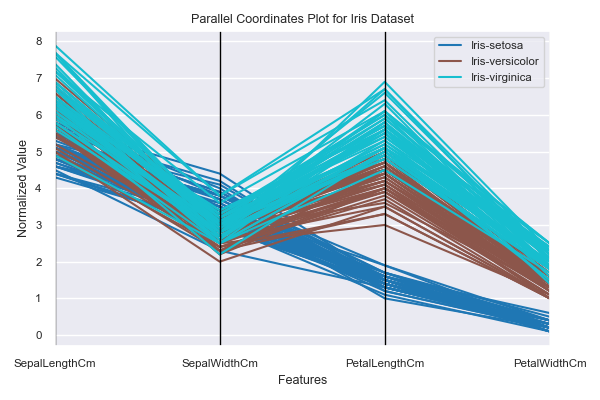

In [18]:
# pd.plotting.parallel_coordinates

df_iris_without_id = df_iris.copy()
df_iris_without_id = df_iris_without_id.drop(columns=['Id']) # remove 'Id' if it exists

plt.figure(figsize=(6, 4))
pd.plotting.parallel_coordinates(df_iris_without_id, 'Species', colormap="tab10")
plt.title('Parallel Coordinates Plot for Iris Dataset')
plt.xlabel('Features')
plt.ylabel('Normalized Value')
plt.grid(True)
plt.tight_layout()
plt.show()

Exporting to PNG, SVG or PDF can be done using the `save` method in Altair. But you may need to first install the package `vl-convert-python`.


In [9]:
!pip install vl-convert-python

Then you can save using:

In [10]:
# save as pdf, png and svg
chart.save("iris.pdf")
chart.save("iris.png")
chart.save("iris.svg")

To save plots from matplotlib or seaborn, you can use the `savefig` method from plt.

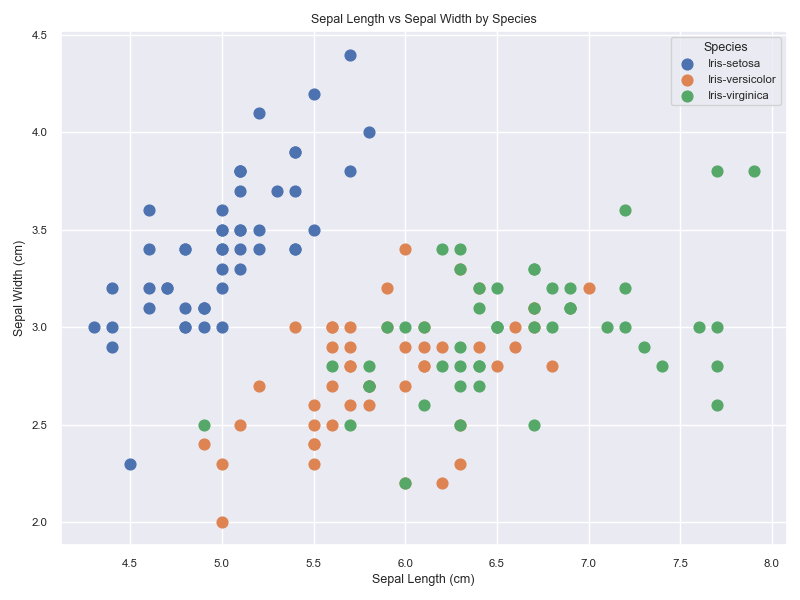

In [11]:
plt.figure(figsize=(8, 6))
# Scatter plot for Sepal Length vs Sepal Width
for species, group_data in df_iris.groupby('Species'):
    plt.scatter(group_data['SepalLengthCm'], group_data['SepalWidthCm'], label=species, s=60)
plt.title('Sepal Length vs Sepal Width by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.tight_layout()

# Save the figure in different formats
plt.savefig('sepal_length_vs_sepal_width.png', dpi=300)  # Save the figure as a PNG file with high resolution (defined by dpi)
plt.savefig('sepal_length_vs_sepal_width.pdf')  # Save the figure as a PDF file
plt.show()